<a href="https://colab.research.google.com/github/Rogerio-mack/game_q/blob/main/geq_analise_todos_questionarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Data Preparation

## Get Answers

In [2]:
def read_files(file):
  df = pd.read_excel('https://github.com/Rogerio-mack/game_q/raw/refs/heads/main/' + file + '.xlsx', skiprows=1, header=0, index_col=0)
  df = df.iloc[:,2:-1]
  df = df.reset_index(drop=True)

  display(df.head())
  print(f'Número de perguntas: {df.shape[1]} e respondentes: {df.shape[0]}')
  return df.copy()

pj = read_files('Pos_Jogo')
mc = read_files('Modulo_Central')
ps = read_files('Presenca_Social')

,Eu me senti revigorado,Eu me senti mal,Achei difícil voltar à realidade,Eu me senti culpado.,Foi como uma vitória,Achei uma perda de tempo,Eu me senti energizado,Eu me senti satisfeito,Eu me senti desorientado,Eu me senti exausto,Senti que poderia ter feito coisas mais úteis,Eu me senti poderoso,Eu me senti esgotado,Senti remorso,Eu me senti envergonhado,Eu me senti orgulhoso,Tive a sensação de ter voltado de uma viagem
0,moderadamente (2),nada (0),nada (0),nada (0),nada (0),ligeiramente (1),moderadamente (2),moderadamente (2),bastante (3),moderadamente (2),moderadamente (2),nada (0),ligeiramente (1),ligeiramente (1),nada (0),moderadamente (2),nada (0)
1,moderadamente (2),nada (0),nada (0),nada (0),bastante (3),nada (0),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),moderadamente (2),nada (0),nada (0),nada (0),bastante (3),nada (0)
2,ligeiramente (1),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),moderadamente (2),moderadamente (2),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),nada (0),nada (0),ligeiramente (1),nada (0)
3,nada (0),ligeiramente (1),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),moderadamente (2),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0)
4,moderadamente (2),nada (0),nada (0),nada (0),moderadamente (2),nada (0),bastante (3),extremamente (4),nada (0),nada (0),nada (0),ligeiramente (1),nada (0),nada (0),nada (0),bastante (3),nada (0)


Número de perguntas: 17 e respondentes: 115


,Eu me senti contente:,Eu me senti habilidoso,Fiquei interessado na história do jogo,Achei divertido,Eu estava totalmente envolvido com o jogo,Eu me senti feliz,Isso me deixou de mau humor,Pensei em outras coisas,Achei ele cansativo,Eu me senti competente,...,Perdi a noção do tempo,Eu me senti desafiado,Achei impressionante,Estava profundamente concentrado no jogo,Eu me senti frustrado,Pareceu uma experiência valiosa,Perdi a conexão com o mundo exterior,Senti a pressão do tempo,Tive de me esforçar muito no jogo,Em qual plataforma (sistema operacional) você utilizou o jogo?
0,bastante (3),bastante (3),nada (0),bastante (3),moderadamente (2),bastante (3),nada (0),moderadamente (2),nada (0),extremamente (4),...,nada (0),nada (0),nada (0),moderadamente (2),nada (0),nada (0),ligeiramente (1),bastante (3),bastante (3),PC
1,bastante (3),nada (0),nada (0),extremamente (4),ligeiramente (1),bastante (3),nada (0),ligeiramente (1),nada (0),moderadamente (2),...,moderadamente (2),moderadamente (2),moderadamente (2),ligeiramente (1),ligeiramente (1),moderadamente (2),nada (0),nada (0),ligeiramente (1),PC
2,moderadamente (2),moderadamente (2),nada (0),ligeiramente (1),moderadamente (2),ligeiramente (1),nada (0),moderadamente (2),nada (0),moderadamente (2),...,ligeiramente (1),moderadamente (2),ligeiramente (1),moderadamente (2),nada (0),nada (0),ligeiramente (1),ligeiramente (1),ligeiramente (1),PC
3,extremamente (4),bastante (3),moderadamente (2),bastante (3),bastante (3),extremamente (4),nada (0),nada (0),nada (0),bastante (3),...,ligeiramente (1),bastante (3),bastante (3),bastante (3),nada (0),moderadamente (2),moderadamente (2),bastante (3),moderadamente (2),PC
4,extremamente (4),extremamente (4),extremamente (4),extremamente (4),extremamente (4),extremamente (4),nada (0),ligeiramente (1),nada (0),extremamente (4),...,ligeiramente (1),ligeiramente (1),ligeiramente (1),moderadamente (2),nada (0),moderadamente (2),nada (0),nada (0),nada (0),PC


Número de perguntas: 34 e respondentes: 115


,Tive empatia com o(s) outro(s),As minhas ações dependiam das ações do(s) outro(s),As ações dos outros dependiam das minhas ações,Eu me senti conectado com o(s) outro(s),Os outros prestaram atenção em mim.,Prestei muita atenção no(s) outro(s),Senti ciúmes do(s) outro(s),Achei que foi agradável estar com o(s) outro(s),"Quando eu estava feliz, o(s) outro(s) também estava(m) feliz(es).","Quando o(s) outro(s) estava(m) feliz(es), eu também estava feliz.",Influenciei o humor do(s) outro(s),Fui influenciado pelo humor do(s) outro(s),Admirei o(s) outro(s),O que o(s) outro(s) fazia(m) afetava o que eu fazia,O que eu fazia afetava o que o(s) outro(s) fazia(m),Eu me senti vingativo,Senti tristeza
0,bastante (3),nada (0),nada (0),ligeiramente (1),moderadamente (2),ligeiramente (1),nada (0),moderadamente (2),moderadamente (2),moderadamente (2),bastante (3),bastante (3),nada (0),nada (0),nada (0),nada (0),nada (0)
1,moderadamente (2),bastante (3),nada (0),bastante (3),moderadamente (2),moderadamente (2),bastante (3),bastante (3),bastante (3),bastante (3),ligeiramente (1),bastante (3),bastante (3),moderadamente (2),moderadamente (2),nada (0),nada (0)
2,bastante (3),nada (0),nada (0),moderadamente (2),ligeiramente (1),ligeiramente (1),nada (0),moderadamente (2),moderadamente (2),moderadamente (2),nada (0),ligeiramente (1),bastante (3),ligeiramente (1),ligeiramente (1),nada (0),nada (0)
3,extremamente (4),moderadamente (2),moderadamente (2),bastante (3),ligeiramente (1),ligeiramente (1),nada (0),extremamente (4),extremamente (4),extremamente (4),moderadamente (2),moderadamente (2),bastante (3),ligeiramente (1),ligeiramente (1),extremamente (4),nada (0)
4,nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),moderadamente (2),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0),nada (0)


Número de perguntas: 17 e respondentes: 115


Pergunta excluída...

In [3]:
mc.iloc[:,-1].value_counts()

,count
Em qual plataforma (sistema operacional) você utilizou o jogo?,
PC,89
Celular,25
Tablet,1


In [4]:
mc = mc.iloc[:,:-1]

## Answer Summaries

In [5]:
def create_summary(df):

  def create_value_counts_dataframe(df):
      new_df = pd.DataFrame(index=df.columns)
      for col in df.columns:
          value_counts = df[col].value_counts()
          for value, count in value_counts.items():
              new_df.loc[col, value] = count
      return new_df

  df_counts = create_value_counts_dataframe(df)

  df_counts['total'] = df_counts.sum(axis=1)
  df_counts = df_counts[['nada (0)', 'ligeiramente (1)', 'moderadamente (2)', 'bastante (3)', 'extremamente (4)', 'total']]
  df_counts.fillna(0, inplace=True)
  df_counts = df_counts.astype(int)

  # display(df_counts)
  return df_counts.copy()

pj_counts = create_summary(pj)
mc_counts = create_summary(mc)
ps_counts = create_summary(ps)



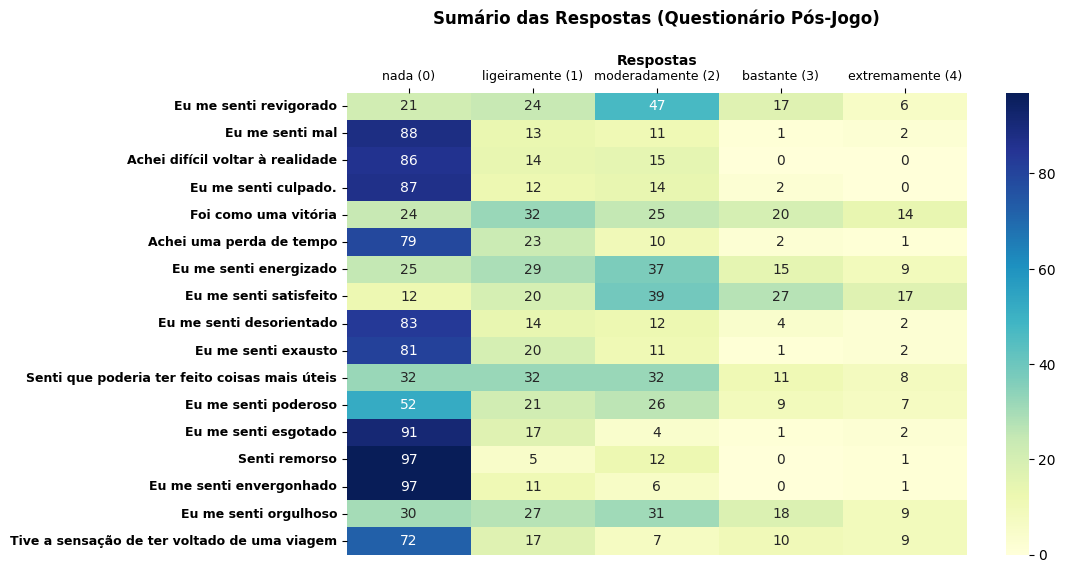

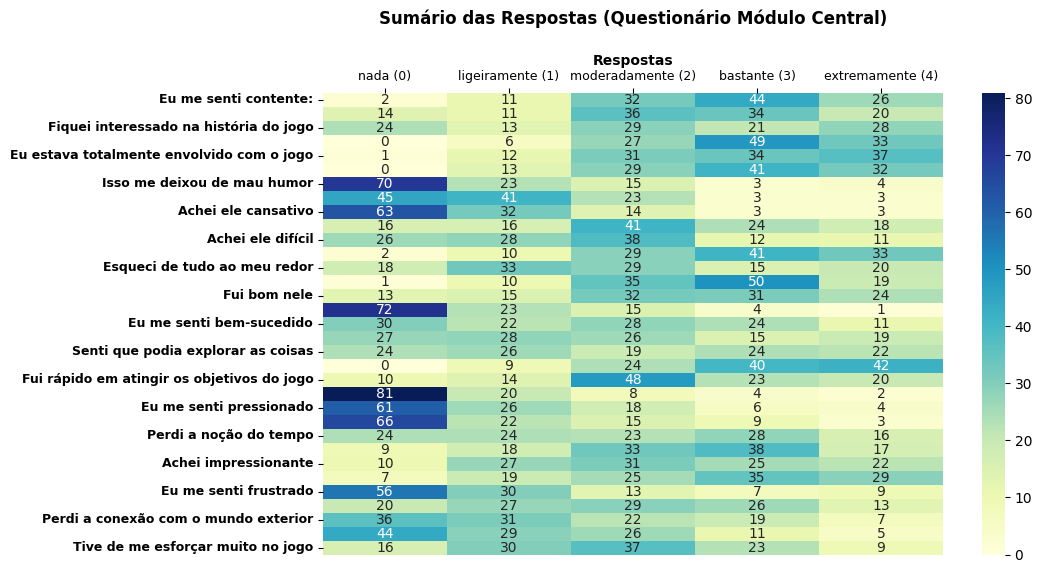

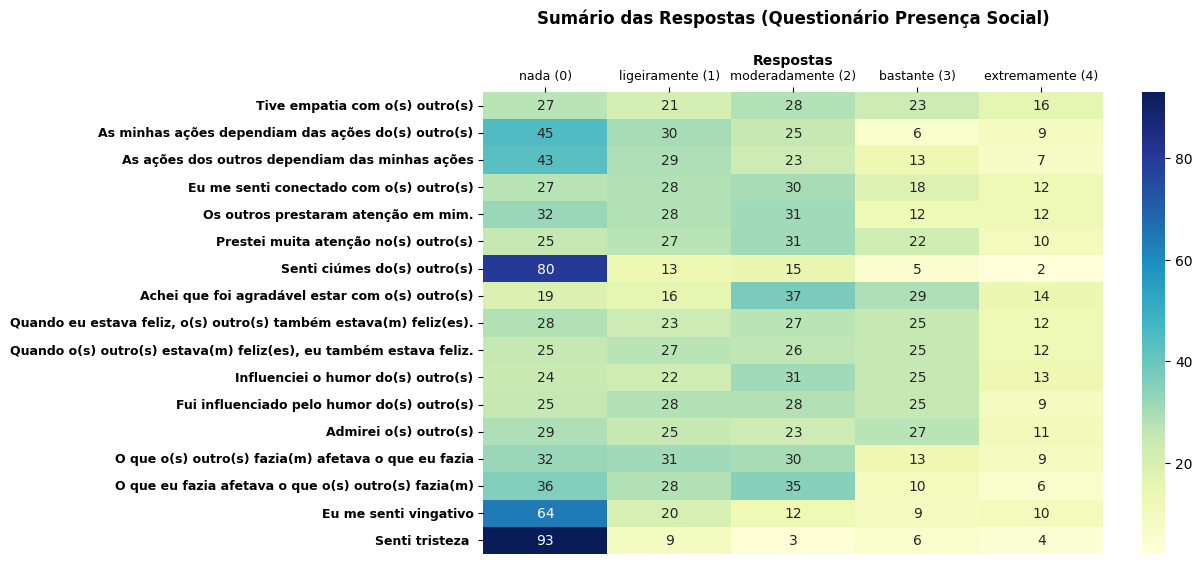

In [6]:
def show_summary(df_counts, questionario):

  plt.figure(figsize=(10, int(df_counts.shape[0]/17)*6)) # adapta para o nr de perguntas
  ax = sns.heatmap(df_counts.drop(columns='total'), annot=True, fmt=".0f", cmap="YlGnBu")

  ax.set_title("Sumário das Respostas (Questionário " + questionario + ")\n",fontsize=12,weight='bold')
  # plt.xlabel("Respostas") # Remove the xlabel

  ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),rotation=0,fontsize=9)
  ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),rotation=0,fontsize=9, weight='bold')

  # Place x-axis labels on top
  ax.xaxis.tick_top() # Move x-axis ticks to the top
  ax.xaxis.set_label_position('top') # Move x-axis label to the top

  # Set the xlabel
  ax.set_xlabel("Respostas", fontsize=10, weight='bold')

  plt.show()

  return

show_summary(pj_counts, 'Pós-Jogo')
show_summary(mc_counts, 'Módulo Central')
show_summary(ps_counts, 'Presença Social')


In [7]:
def normalize_df(df):
  from sklearn.preprocessing import StandardScaler

  df.columns = [f'Q{i+1}' for i in range(0,df.shape[1])]

  for c in df:
    df[c] = df[c].map({'moderadamente (2)': 2, 'ligeiramente (1)': 1, 'nada (0)': 0, 'bastante (3)': 3, 'extremamente (4)': 4})

  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df)

  return pd.DataFrame(scaled_data, columns=df.columns).copy()

pj = normalize_df(pj)
mc = normalize_df(mc)
ps = normalize_df(ps)

display(pj.head())
display(mc.head())
display(ps.head())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,0.294673,-0.480787,-0.542673,-0.521718,-1.321881,0.678660,0.337434,-0.125135,2.666338,1.838769,0.506150,-0.900917,0.930120,0.991050,-0.376748,0.356078,-0.644152
1,0.294673,-0.480787,-0.542673,-0.521718,0.981397,-0.580145,0.337434,-0.125135,1.597944,1.838769,0.506150,0.717918,-0.423852,-0.398837,-0.376748,1.158999,-0.644152
2,-0.621203,-0.480787,-0.542673,-0.521718,-0.554122,-0.580145,0.337434,-0.125135,-0.538842,-0.550592,-0.337434,-0.900917,-0.423852,-0.398837,-0.376748,-0.446843,-0.644152
3,-1.537080,0.721180,-0.542673,-0.521718,-1.321881,0.678660,-1.349734,-1.818144,1.597944,-0.550592,-1.181017,-0.900917,-0.423852,-0.398837,-0.376748,-1.249764,-0.644152
4,0.294673,-0.480787,-0.542673,-0.521718,0.213637,-0.580145,1.181017,1.567873,-0.538842,-0.550592,-1.181017,-0.091499,-0.423852,-0.398837,-0.376748,1.158999,-0.644152


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33
0,0.302369,0.571574,-1.481444,0.061161,-0.796324,0.205999,-0.660969,1.10201,-0.733821,1.537806,...,-0.719778,-1.400316,-2.033915,-1.772364,-0.433351,-0.789882,-1.481878,-0.313302,1.576032,1.038380
1,0.302369,-1.893340,-1.481444,1.233410,-1.770551,0.205999,-0.660969,0.06323,-0.733821,-0.084650,...,1.099441,0.077082,-0.275267,-0.154730,-1.263942,0.013980,0.103387,-1.113962,-1.000892,-0.717704
2,-0.720349,-0.250064,-1.481444,-2.283338,-0.796324,-1.853987,-0.660969,1.10201,-0.733821,-0.084650,...,-0.719778,-0.661617,-0.275267,-0.963547,-0.433351,-0.789882,-1.481878,-0.313302,-0.141918,-0.717704
3,1.325086,0.571574,-0.096354,0.061161,0.177902,1.235992,-0.660969,-0.97555,-0.733821,0.726578,...,-0.719778,-0.661617,0.604057,0.654087,0.397239,-0.789882,0.103387,0.487358,1.576032,0.160338
4,1.325086,1.393213,1.288736,1.233410,1.152129,1.235992,-0.660969,0.06323,-0.733821,1.537806,...,-0.719778,-0.661617,-1.154591,-0.963547,-0.433351,-0.789882,0.103387,-1.113962,-1.000892,-1.595745


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,0.863541,-0.953163,-1.00194,-0.509956,0.380118,-0.558608,-0.581233,-0.021032,0.197728,0.187856,0.902117,1.047390,-1.286138,-1.178996,-1.145548,-0.728531,-0.420419
1,0.127932,1.500877,-1.00194,1.053910,0.380118,0.244391,2.457029,0.785197,0.955686,0.959407,-0.646292,1.047390,0.977727,0.454553,0.587847,-0.728531,-0.420419
2,0.863541,-0.953163,-1.00194,0.271977,-0.400481,-0.558608,-0.581233,-0.021032,0.197728,0.187856,-1.420497,-0.558608,0.977727,-0.362222,-0.278850,-0.728531,-0.420419
3,1.599151,0.682863,0.62092,1.053910,-0.400481,-0.558608,-0.581233,1.591426,1.713644,1.730959,0.127912,0.244391,0.977727,-0.362222,-0.278850,2.290606,-0.420419
4,-1.343287,-0.953163,-1.00194,-1.291889,-1.181080,-1.361607,-0.581233,-0.021032,-1.318188,-1.355247,-1.420497,-1.361607,-1.286138,-1.178996,-1.145548,-0.728531,-0.420419


# KMO e teste de esfericidade de Bartlett

Um KMO alto e um teste de esfericidade de Bartlett significativo fornecem evidências de que a análise fatorial é uma abordagem apropriada.

#### KMO

- Próximo de $1$ ($0.8 - 1.0$): A adequação da amostra é excelente. A análise fatorial é provavelmente apropriada.
- $0.7 - 0.79$: A adequação da amostra é boa.
- $0.6 - 0.69$: A adequação da amostra é mediana.
- $0.5 - 0.59$: A adequação da amostra é ruim.
- Abaixo de $0.5$: A adequação da amostra é inaceitável. A análise fatorial pode não ser apropriada.

### Bartlett

- Significativo: *p-value* $< 1$

Podemos concluir que a análise fatorial é adequada para as amostras. O teste de esfericidade de Bartlett é significativo (valor p < 0.05), o que fornece evidências de que as perguntas do GEQ são correlacionadas e que a análise fatorial é apropriada. O KMO ($>0.7$) também traz evidências de que a amostra é adequada para análise fatorial, estando 100% das variáveis com KMO $>0.6$.

In [8]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42656 sha256=14ecd3e6f54ad38dd83d7ae1e69880345b93b5ceea5d3648a402b6aecf0ccbf0
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [9]:
def kmo(df,questionario):
  from factor_analyzer import calculate_kmo

  threshold = 0.6

  kmo_all, kmo_model = calculate_kmo(np.array(df))

  print(f'\nQuestionário {questionario}')
  print("KMO para cada variável:\n", kmo_all)
  print("\nKMO para o modelo:\n", kmo_model)

  print(f"\nPercentual de variáveis com KMO <= {threshold}: {len(kmo_all[ kmo_all < threshold ])/len(kmo_all):.2f}.\n")

  return # kmo_all, kmo_model

kmo(pj, 'Pós-Jogo')
kmo(mc, 'Módulo Central')
kmo(ps, 'Presença Social')


Questionário Pós-Jogo
KMO para cada variável:
 [0.87438746 0.74559809 0.71519011 0.63902355 0.81883873 0.80470865
 0.85680345 0.86042187 0.83387498 0.67614474 0.60180175 0.77509337
 0.61794944 0.80652312 0.74836729 0.8295902  0.7753967 ]

KMO para o modelo:
 0.7710314178166632

Percentual de variáveis com KMO <= 0.6: 0.00.


Questionário Módulo Central
KMO para cada variável:
 [0.93009337 0.78483737 0.89441911 0.81549391 0.88776245 0.89660582
 0.78916514 0.75843673 0.75457367 0.80030221 0.87610913 0.86195374
 0.85917035 0.88835473 0.79777892 0.70803933 0.84870742 0.86868674
 0.8177595  0.8402787  0.83879654 0.71331031 0.64587653 0.79924698
 0.90736957 0.88521321 0.92217412 0.88057907 0.82070168 0.88285913
 0.85907712 0.70445746 0.84759856]

KMO para o modelo:
 0.8444167507842716

Percentual de variáveis com KMO <= 0.6: 0.00.


Questionário Presença Social
KMO para cada variável:
 [0.88256857 0.82039342 0.84107917 0.91105562 0.88008169 0.89315592
 0.68348561 0.92807499 0.81320948 0.811

/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [10]:
def bartlett_sphericity(df,questionario):
  from factor_analyzer import calculate_bartlett_sphericity

  print(f'\nQuestionário {questionario}')
  chi_square_value, p_value = calculate_bartlett_sphericity(df)

  # Imprime os resultados
  print("Estatística do teste de Bartlett:", chi_square_value)
  if p_value < 0.05:
    print("Valor p do teste de Bartlett < 0.05 (significativo):", p_value)
  else:
    print("Valor p do teste de Bartlett >= 0.05:", p_value)

  return # chi_square_value, p_value

bartlett_sphericity(pj, 'Pós-Jogo')
bartlett_sphericity(mc, 'Módulo Central')
bartlett_sphericity(ps, 'Presença Social')



Questionário Pós-Jogo
Estatística do teste de Bartlett: 921.0049771494814
Valor p do teste de Bartlett < 0.05 (significativo): 8.892048149356921e-117

Questionário Módulo Central
Estatística do teste de Bartlett: 2427.127520855791
Valor p do teste de Bartlett < 0.05 (significativo): 2.1490955019436563e-240

Questionário Presença Social
Estatística do teste de Bartlett: 1331.2100257977747
Valor p do teste de Bartlett < 0.05 (significativo): 3.723687717794553e-195


# PCA

## Construtos GEQ

| Escala            | Objetivo                                                        | Características                                                                                |
| ----------------- | --------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| Immersion         | Medir o envolvimento e conexão com o jogo.                      | Imersão sensorial e imaginativa, equilíbrio entre desafio e imersão.                           |
| Flow              | Avaliar o estado de foco, prazer e perda da autoconsciência.   | Equilíbrio entre desafio e habilidades do jogador.                                               |
| Competence        | Medir o senso de habilidade e maestria.                         | Capacidade de superar desafios e controlar eventos no jogo.                                      |
| Tension           | Avaliar sentimentos negativos como frustração e ansiedade.     | Problemas de usabilidade, dificuldades excessivas.                                               |
| Negative Affect   | Medir emoções negativas gerais.                                | Tédio, tristeza, raiva.                                                                         |
| Positive Affect   | Avaliar emoções positivas gerais.                                | Alegria, entusiasmo, excitação.                                                                    |
| Presence          | Medir a sensação de "estar lá" no mundo do jogo.                  | Percepção de realidade do ambiente virtual.                                                        |


## Validação da Estrutura Teórica

Se adequado, os componentes principais devem corresponder aos construtos teóricos originais (as escalas do GEQ) fornecendo evidências de que o questionário está medindo o que se propõe a medir.

## Análise da Quantidade de Componentes

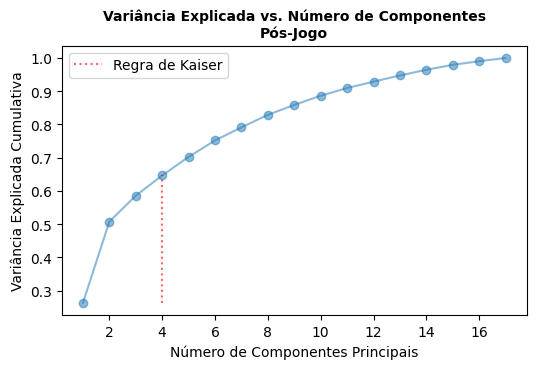

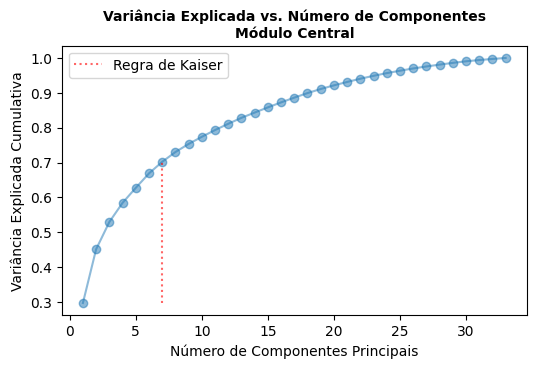

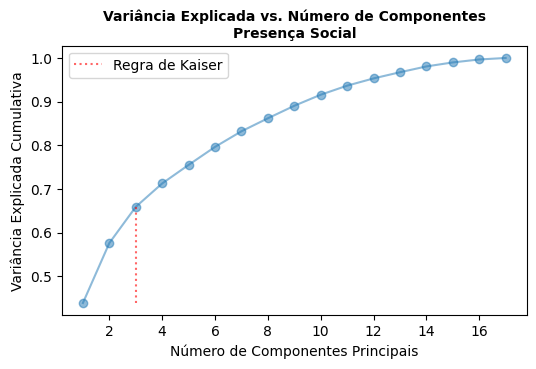

In [11]:
def pca_nr_componentes(df,questionario):
  from sklearn.decomposition import PCA

  # Aplica PCA
  pca = PCA() # n_components=None -> mantém todos os componentes
  pca.fit(df)

  # Variância explicada por cada componente
  explained_variance = pca.explained_variance_ratio_
  # print("Variância explicada por componente:\n", explained_variance)

  # Variância explicada cumulativa
  cumulative_variance = np.cumsum(explained_variance)
  # print("\nVariância explicada cumulativa:\n", cumulative_variance)

  # Visualização
  fig = plt.figure(figsize=(6,3.5))
  plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o',alpha=0.5)
  plt.xlabel("Número de Componentes Principais")
  plt.ylabel("Variância Explicada Cumulativa")
  plt.title("Variância Explicada vs. Número de Componentes\n" + questionario,fontsize=10,weight='bold')

  # Eigenvalues
  eigenvalues = pca.explained_variance_
  # print("\nEigenvalues:\n", eigenvalues)

  # Aplica a regra de Kaiser
  num_componentes_kaiser = sum(eigenvalues > 1)
  # print("\nNúmero de componentes segundo a regra de Kaiser:", num_componentes_kaiser)

  plt.vlines(num_componentes_kaiser, cumulative_variance[0], cumulative_variance[num_componentes_kaiser-1],
             color='r',linestyles=':',label='Regra de Kaiser',alpha=0.6)
  plt.legend()

  plt.show()
  return # cumulative_variance

pca_nr_componentes(pj, 'Pós-Jogo')
pca_nr_componentes(mc, 'Módulo Central')
pca_nr_componentes(ps, 'Presença Social')


## Cargas Fatorais e Estrutura

Depende de quantos componentes escolhermos. Aqui emprego 7 imaginando que seja a quantidade de construtos do GEQ, mas emprego o mesmo valor para os 3 questionários o que talvez não seja o correto.

### Loadings Matrix $\times$ Structure Matrix

* **Matriz de Cargas Fatoriais (Loadings Matrix)**: Correlação entre variáveis e fatores, levando em conta a correlação entre os fatores (mais relevante com rotação oblíqua).
* **Matriz de Estrutura (Structure Matrix)**: Correlação direta entre variáveis e fatores, sem levar em conta a correlação entre os fatores (útil com rotação oblíqua).

Atenção: Se estiver usando rotação Varimax (ortogonal), as duas matrizes são iguais. Aqui emprego a **Promax** como padrão.

In [12]:
%%script echo "Funciona, mas na sequencia há uma solução com layout melhor."
def pca_loadings(df, n_components, rotation, questionario):
  from factor_analyzer import FactorAnalyzer
  from scipy.cluster.hierarchy import dendrogram

  if rotation == '':
    rotation = 'promax'

  fa = FactorAnalyzer(n_factors=n_components, rotation=rotation) # Rotação Promax
  fa.fit(df)

  loadings = fa.loadings_
  structure = fa.structure_

  loadings_df = pd.DataFrame(loadings,
                            index=df.columns,
                            columns=[f'Fator{i+1}' for i in range(n_components)])

  structure_df = pd.DataFrame(structure,
                            index=df.columns,
                            columns=[f'Fator{i+1}' for i in range(n_components)])

  # print("\nCargas Fatoriais (Pattern Matrix):\n", loadings)
  # print("\nMatriz de Estrutura:\n", structure)

  tipo = {0:'Carga dos Fatores',1:'Estrutura dos Fatores'}

  for i, temp in zip(range(2),[loadings_df, structure_df]):
    linkage_matrix = sns.clustermap(temp, metric='euclidean', method='ward', cmap="YlGnBu",
                                   annot=True, fmt=".2f", center=0, annot_kws={"fontsize": 8}).dendrogram_row.linkage
    plt.close() # Fecha plt para não nada


    clustermap = sns.clustermap(temp, metric='euclidean', method='ward', cmap="YlGnBu",
                                   annot=True, fmt=".2f", center=0, annot_kws={"fontsize": 8})
    clustermap.savefig("clustermap.png")

    plt.close(clustermap.fig)  # Fecha a figura para não exibir agora

    fig, ax = plt.subplots(1,2,figsize=(16, int(temp.shape[0]/17)*6)) # adapta para o nr de perguntas
    img = Image.open("clustermap.png")
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title(f'{tipo[i]} ({rotation})', fontsize=14, weight='bold')

    # plt.figure(figsize=(10, int(temp.shape[0]/17)*6)) # adapta para o nr de perguntas
    dendrogram(linkage_matrix, labels=temp.index, orientation='right',leaf_font_size=8,ax=ax[1])

    ax[1].set_title('Clusters das Questões', fontsize=14, weight='bold')
    ax[1].set_xlabel("Distância")

    plt.suptitle(f'Análise e Cluster da {tipo[i]} ({questionario})', fontsize=14, weight='bold')

    plt.tight_layout()
    plt.show()

  return

pca_loadings(pj, 7, 'promax', 'Pós-Jogo')
pca_loadings(mc, 7, 'promax', 'Módulo Central')
pca_loadings(ps, 7, 'promax', 'Presença Social')


Funciona, mas na sequencia há uma solução com layout melhor.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


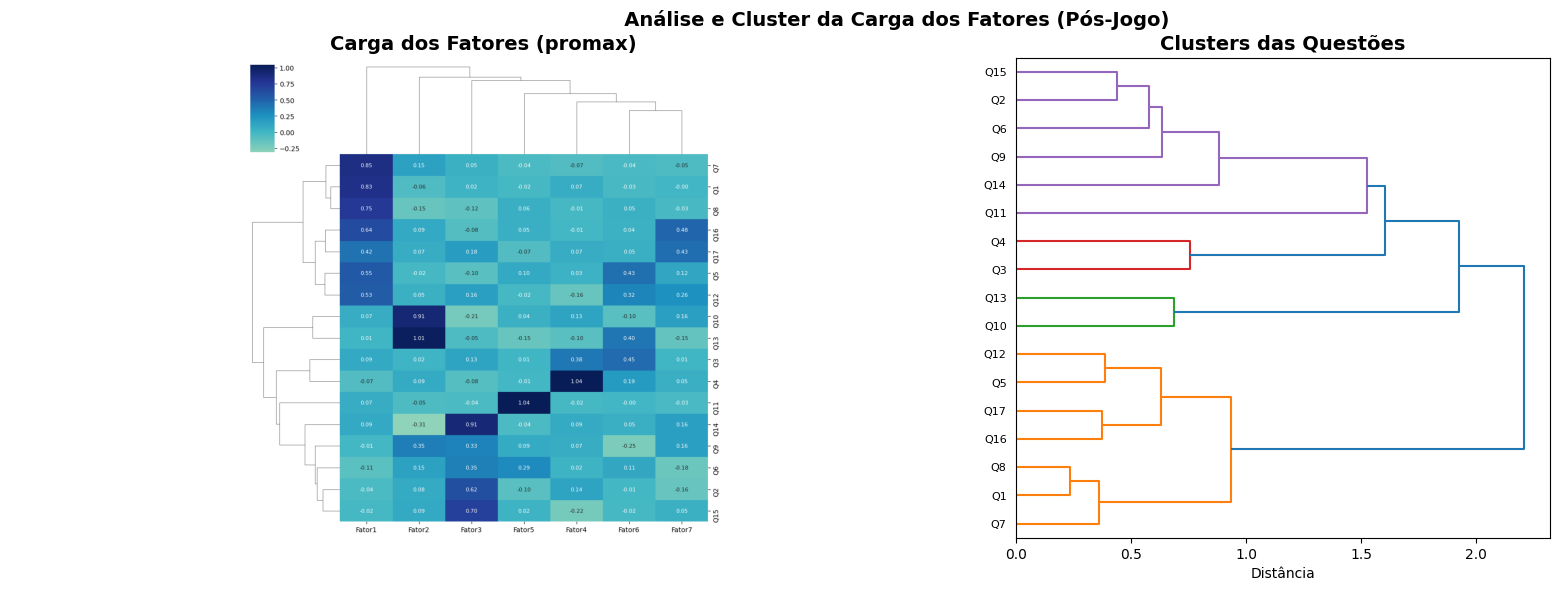

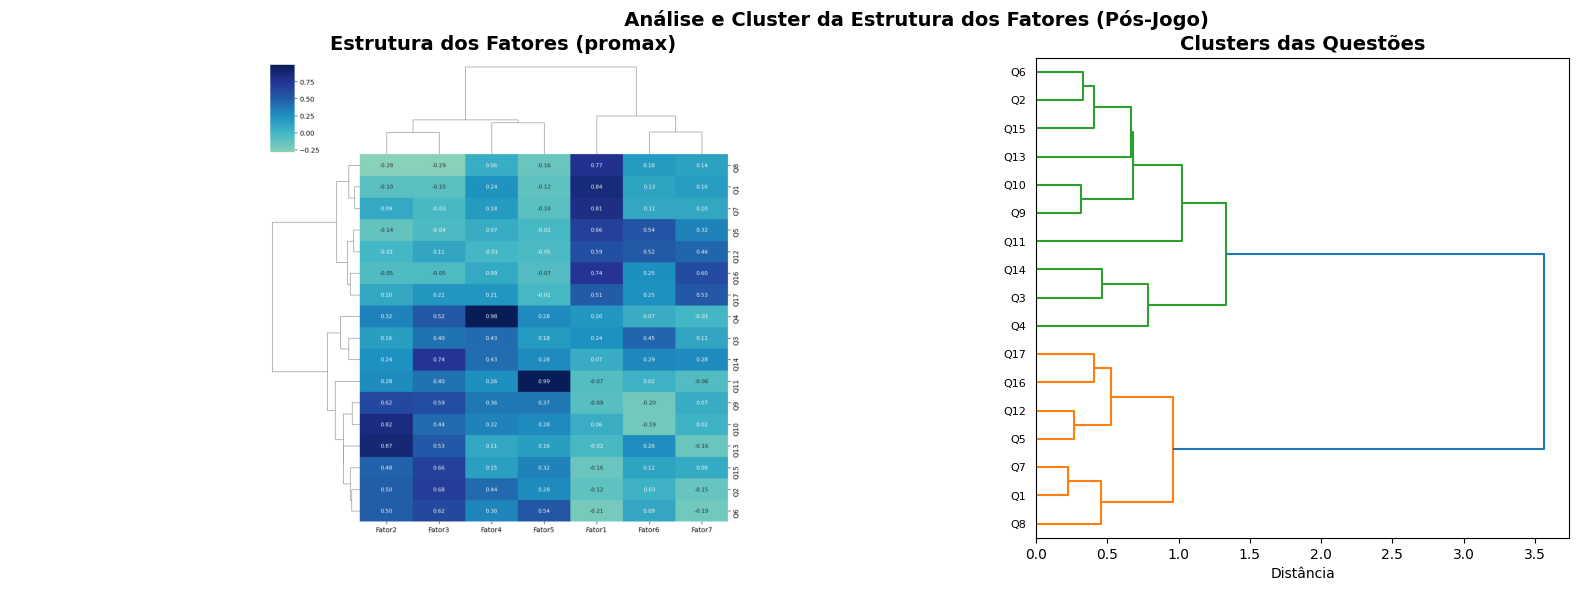

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


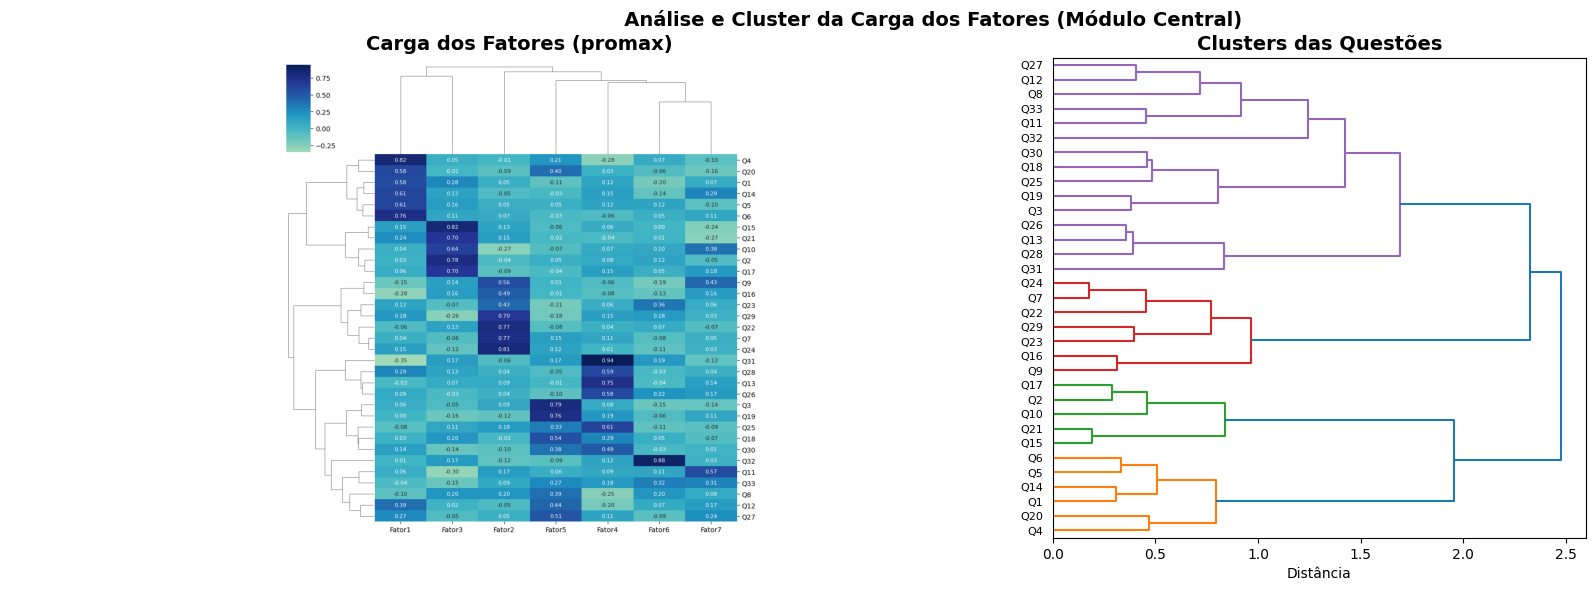

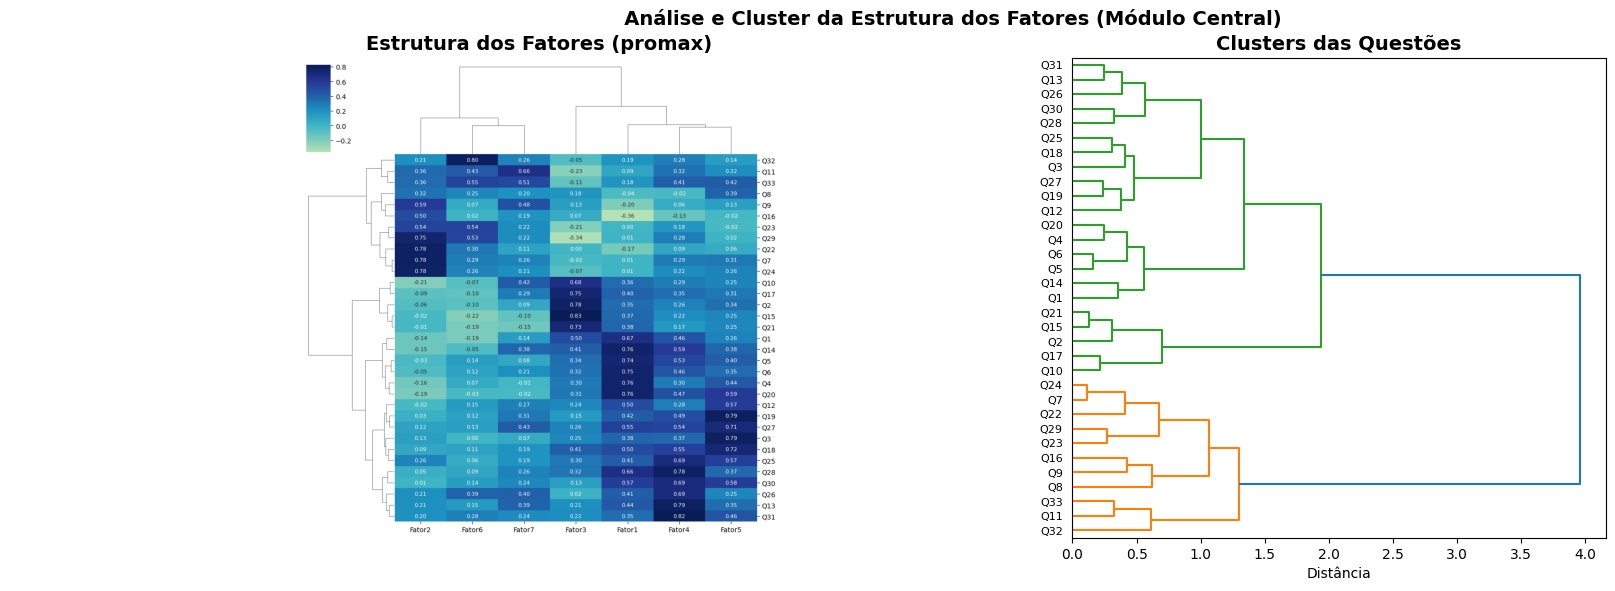

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


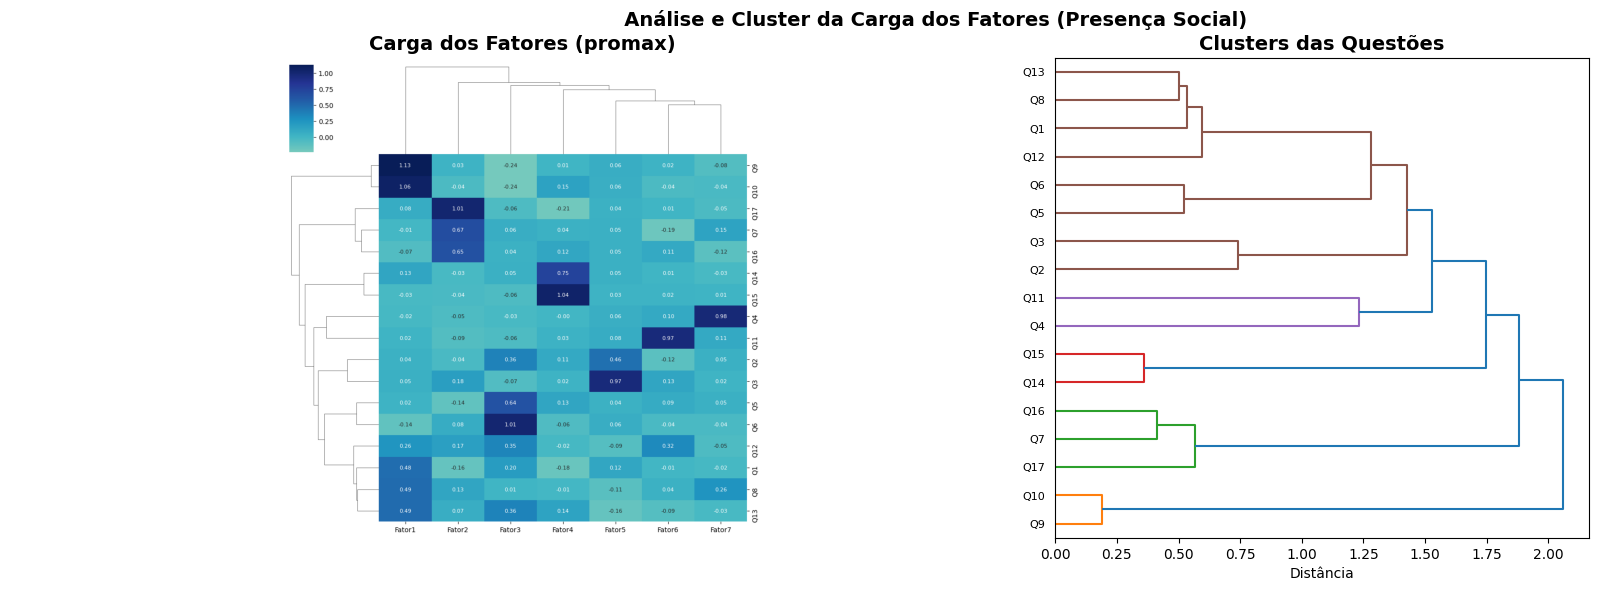

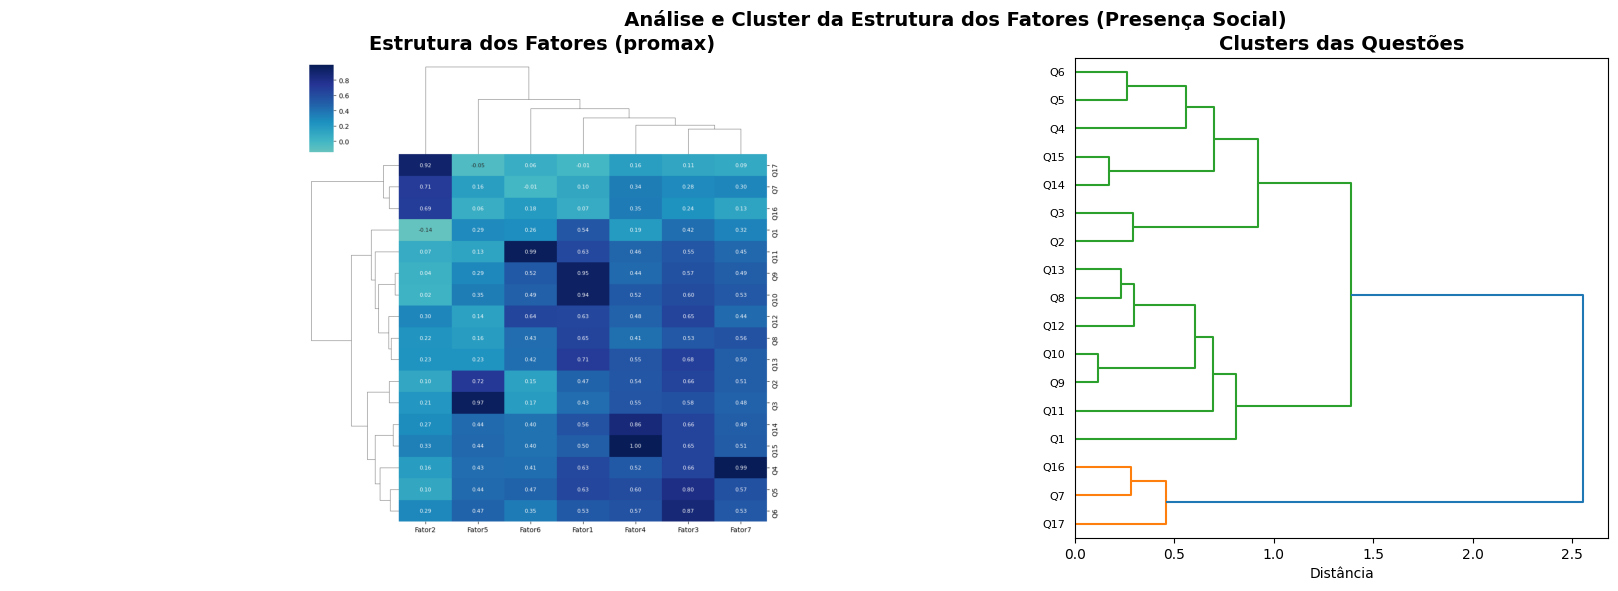

In [13]:
def pca_loadings(df, n_components, rotation, questionario):
  from factor_analyzer import FactorAnalyzer
  from scipy.cluster.hierarchy import dendrogram
  from PIL import Image

  if rotation == '':
    rotation = 'promax'

  fa = FactorAnalyzer(n_factors=n_components, rotation=rotation) # Rotação Promax
  fa.fit(df)

  loadings = fa.loadings_
  structure = fa.structure_

  loadings_df = pd.DataFrame(loadings,
                            index=df.columns,
                            columns=[f'Fator{i+1}' for i in range(n_components)])

  structure_df = pd.DataFrame(structure,
                            index=df.columns,
                            columns=[f'Fator{i+1}' for i in range(n_components)])

  # print("\nCargas Fatoriais (Pattern Matrix):\n", loadings)
  # print("\nMatriz de Estrutura:\n", structure)

  tipo = {0:'Carga dos Fatores',1:'Estrutura dos Fatores'}

  for i, temp in zip(range(2),[loadings_df, structure_df]):
    linkage_matrix = sns.clustermap(temp, metric='euclidean', method='ward', cmap="YlGnBu",
                                   annot=True, fmt=".2f", center=0, annot_kws={"fontsize": 8}).dendrogram_row.linkage
    plt.close() # Fecha plt para não nada


    clustermap = sns.clustermap(temp, metric='euclidean', method='ward', cmap="YlGnBu",
                                   annot=True, fmt=".2f", center=0, annot_kws={"fontsize": 8})
    clustermap.savefig("clustermap.png")

    plt.close(clustermap.fig)  # Fecha a figura para não exibir agora

    # fig, ax = plt.subplots(1,2,figsize=(16, int(temp.shape[0]/17)*6)) # adapta para o nr de perguntas
    fig = plt.figure(figsize=(16, int(temp.shape[0]/17)*6)) # adapta para o nr de perguntas

    # Define as dimensões relativas dos eixos
    largura_ax1 = 2/3
    largura_ax2 = 1/3
    altura = 0.8  # Altura relativa dos eixos (de 0 a 1)
    espaco_vertical = 0.1 # Espaço abaixo e acima (metade abaixo e metade acima)

    # Define a posição e o tamanho de ax1
    left_ax1 = 0.1  # Posição da borda esquerda (de 0 a 1)
    bottom = espaco_vertical # Posição da borda inferior (de 0 a 1)
    largura = largura_ax1
    altura = altura
    ax1 = fig.add_axes([left_ax1, bottom, largura, altura])

    # Define a posição e o tamanho de ax2
    left_ax2 = left_ax1 + largura_ax1 # Posição da borda esquerda (de 0 a 1)
    largura = largura_ax2
    ax2 = fig.add_axes([left_ax2, bottom, largura, altura])

    ax = [ax1, ax2]

    img = Image.open("clustermap.png")
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title(f'{tipo[i]} ({rotation})', fontsize=14, weight='bold')

    # plt.figure(figsize=(10, int(temp.shape[0]/17)*6)) # adapta para o nr de perguntas
    dendrogram(linkage_matrix, labels=temp.index, orientation='right',leaf_font_size=8,ax=ax[1])

    ax[1].set_title('Clusters das Questões', fontsize=14, weight='bold')
    ax[1].set_xlabel("Distância")

    plt.suptitle(f'{90*" "} Análise e Cluster da {tipo[i]} ({questionario})\n', fontsize=14, weight='bold')

    # plt.tight_layout()
    plt.show()

    # warnings.filterwarnings("default")
  return

pca_loadings(pj, 7, 'promax', 'Pós-Jogo')
pca_loadings(mc, 7, 'promax', 'Módulo Central')
pca_loadings(ps, 7, 'promax', 'Presença Social')


## Comunalidades

Comunalidade indica o quanto uma variável se encaixa na estrutura fatorial do modelo. Valores próximos de 1 indicam que a maior parte da variância da variável é explicada pelos fatores.

Aqui, o pior resultado ficou para a comunalidade do Módulo Central (0.62). Os resultados são melhores para o esquema de rotação varimax que promax ou oblimin.

In [17]:
def comunalidades(df, n_components, rotation, questionario):
  from factor_analyzer import FactorAnalyzer
  from scipy.cluster.hierarchy import dendrogram

  if rotation == '':
    rotation = 'promax'

  fa = FactorAnalyzer(n_factors=n_components, rotation=rotation) # Rotação Promax
  fa.fit(df)

  # Criar DataFrame para as comunalidades
  comunalities_df = pd.DataFrame(fa.get_communalities(), index=df.columns, columns=['Comunalidade'])

  print(f'\nQuestionário {questionario}')
  print(f'Comunalidades individuais:\n {comunalities_df}')
  print(f'Comunalidade média:\n {fa.get_communalities().mean():.2f}')

  return

comunalidades(pj, 7, 'varimax', 'Pós-Jogo')
comunalidades(mc, 7, 'varimax', 'Módulo Central')
comunalidades(ps, 7, 'varimax', 'Presença Social')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Questionário Pós-Jogo
Comunalidades individuais:
      Comunalidade
Q1       0.718507
Q2       0.525173
Q3       0.450488
Q4       1.001084
Q5       0.644256
Q6       0.522513
Q7       0.682555
Q8       0.651658
Q9       0.529044
Q10      0.736711
Q11      0.997051
Q12      0.612331
Q13      0.945482
Q14      0.686658
Q15      0.487784
Q16      0.767447
Q17      0.515975
Comunalidade média:
 0.67

Questionário Módulo Central
Comunalidades individuais:
      Comunalidade
Q1       0.592291
Q2       0.640299
Q3       0.667195
Q4       0.653898
Q5       0.593375
Q6       0.595895
Q7       0.666363
Q8       0.327982
Q9       0.565362
Q10      0.659116
Q11      0.598060
Q12      0.450978
Q13      0.658099
Q14      0.720972
Q15      0.752500
Q16      0.393001
Q17      0.640875
Q18      0.640015
Q19      0.697615
Q20      0.708576
Q21      0.629059
Q22      0.626585
Q23      0.463505
Q24      0.650947
Q25      0.629120
Q26      0.572587
Q27      0.660420
Q28      0.690696
Q29      0.750292
Q3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Alfa de Cronbach

Valores próximos de 1 indicam alta consistência interna entre os itens do teste.
Valores abaixo de 0.7 podem sugerir problemas de confiabilidade (dependendo do contexto, valores entre 0.7 e 0.9 são geralmente considerados aceitáveis).

In [15]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.6 MB/s eta 0:00:00


In [16]:
def cronbach_alpha(df, questionario):
  import pingouin as pg

  df = df.astype('int')
  print(f'\nQuestionário {questionario}')
  print(f'Cronbach Alpha: {pg.cronbach_alpha(df)[0]:.2f}')

  return

cronbach_alpha(pj, 'Pós-Jogo')
cronbach_alpha(mc, 'Módulo Central')
cronbach_alpha(ps, 'Presença Social')



Questionário Pós-Jogo
Cronbach Alpha: 0.76

Questionário Módulo Central
Cronbach Alpha: 0.90

Questionário Presença Social
Cronbach Alpha: 0.88
